反向传播：更新权重，损失求权重求导

简单的模型

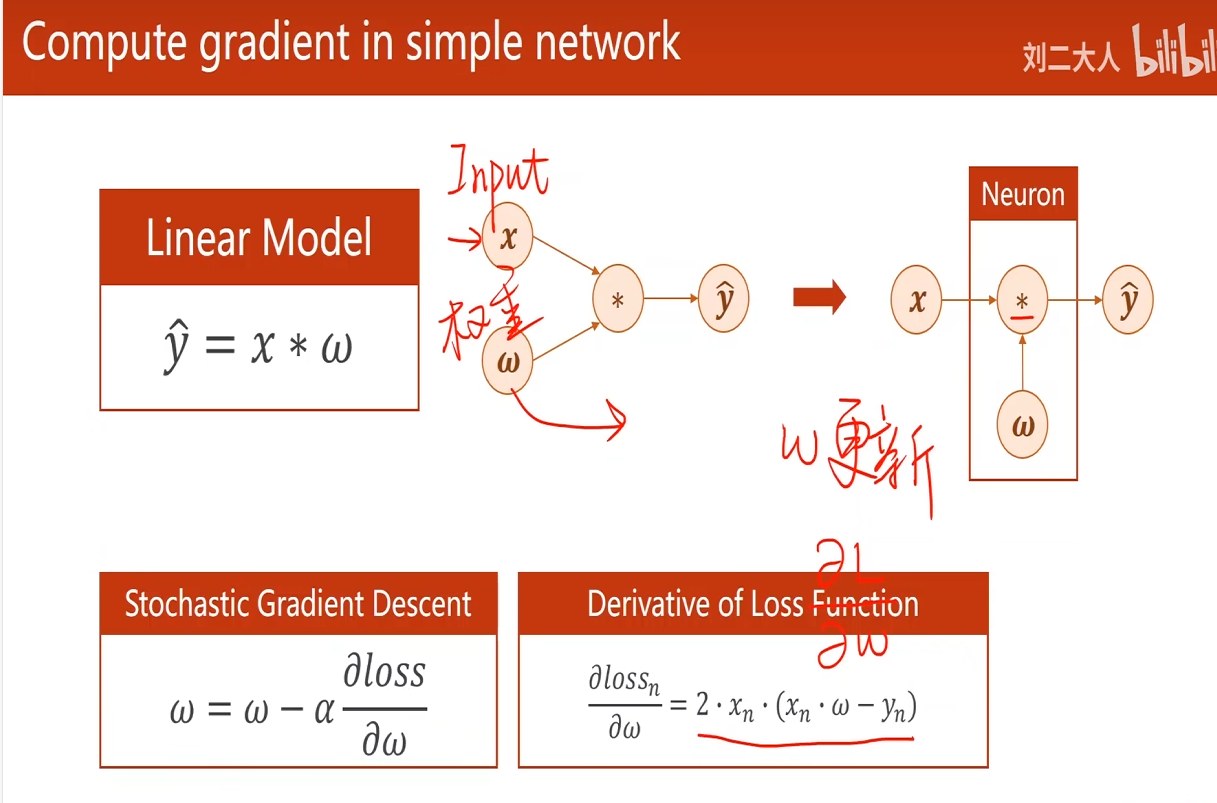

每个节点都对应下一层的所有节点，都有一个权重，权重数=【下一层节点数，上一层节点数】

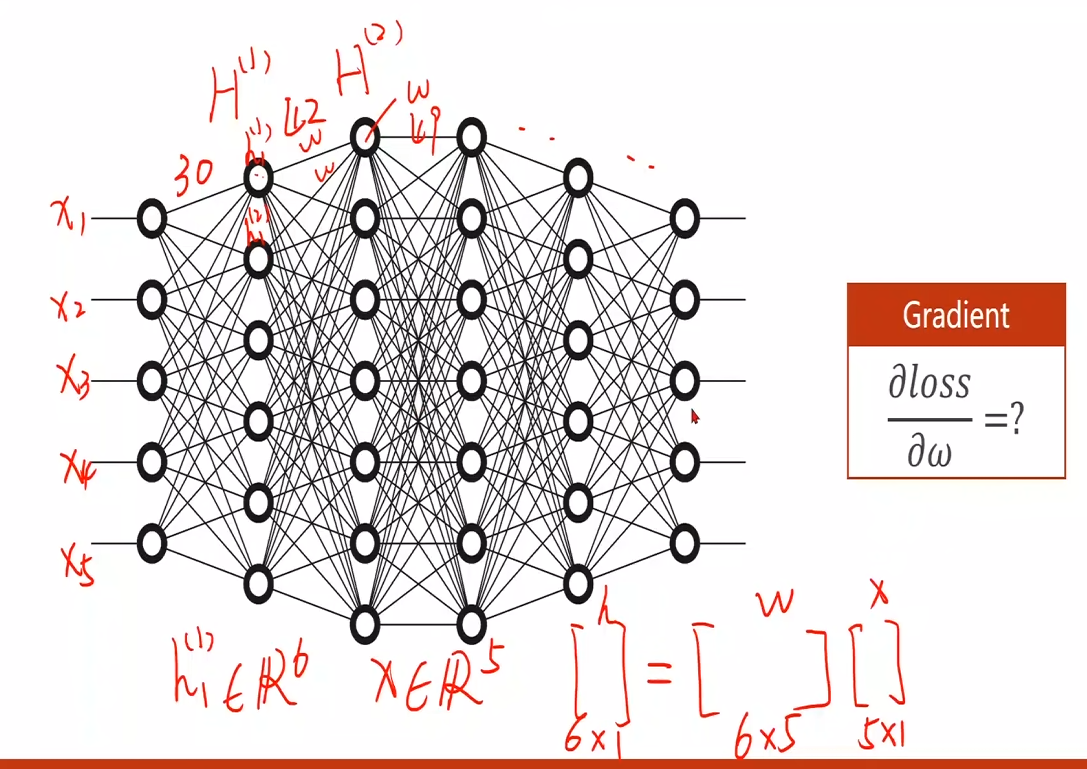

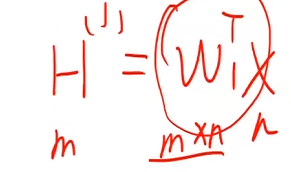

x为n维  

隐藏层m维

w1为m*n

b1为m*1


简单两层

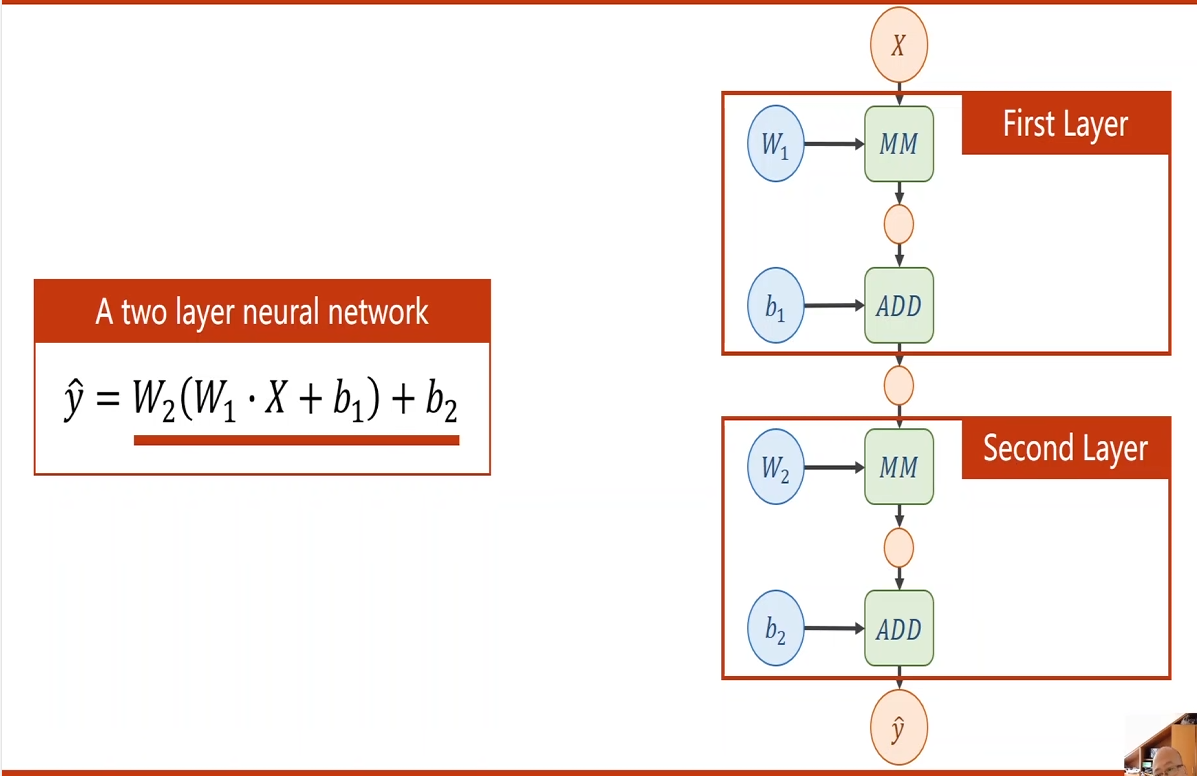



添加非线性函数变换

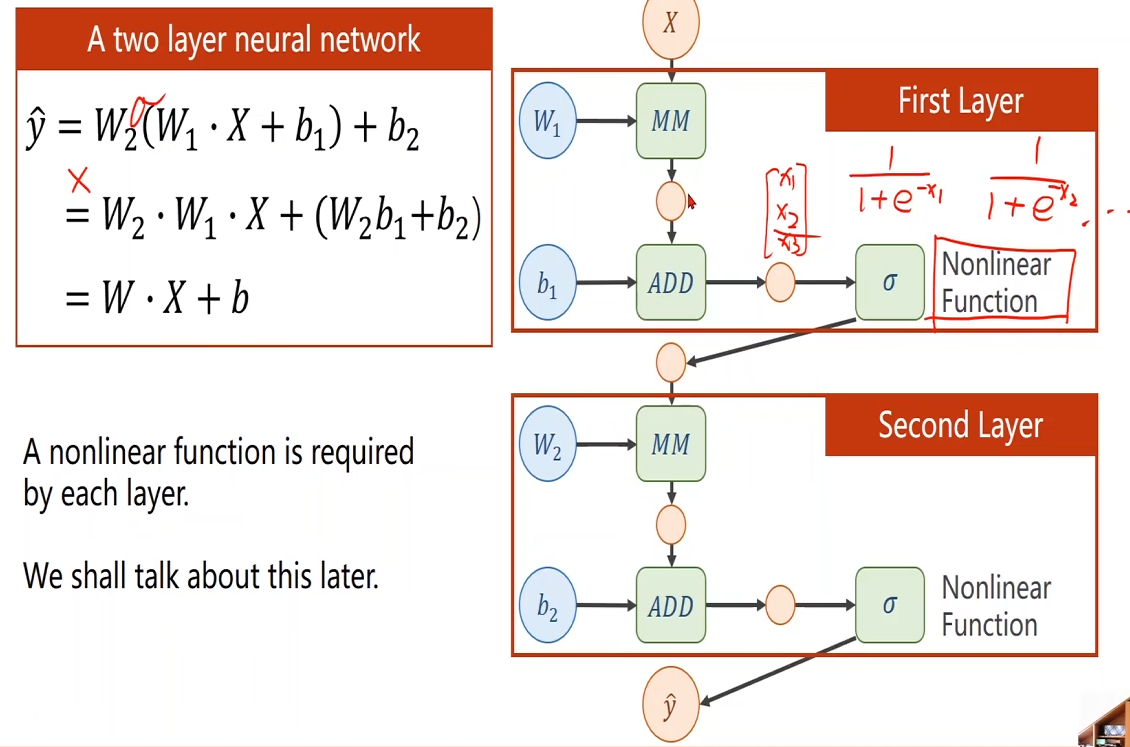

先前馈求loss，再反向传播求梯度，最后更新参数

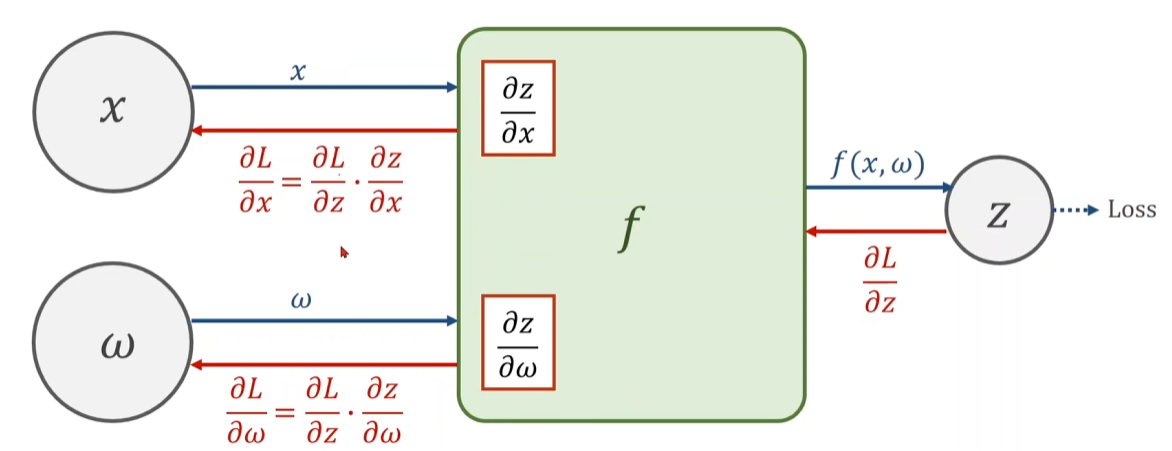

举例

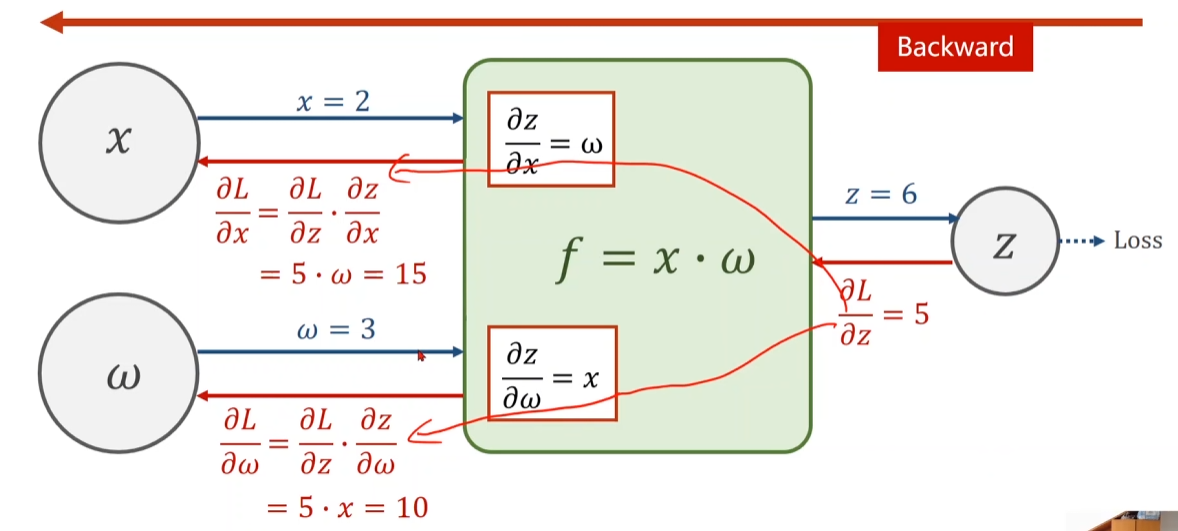

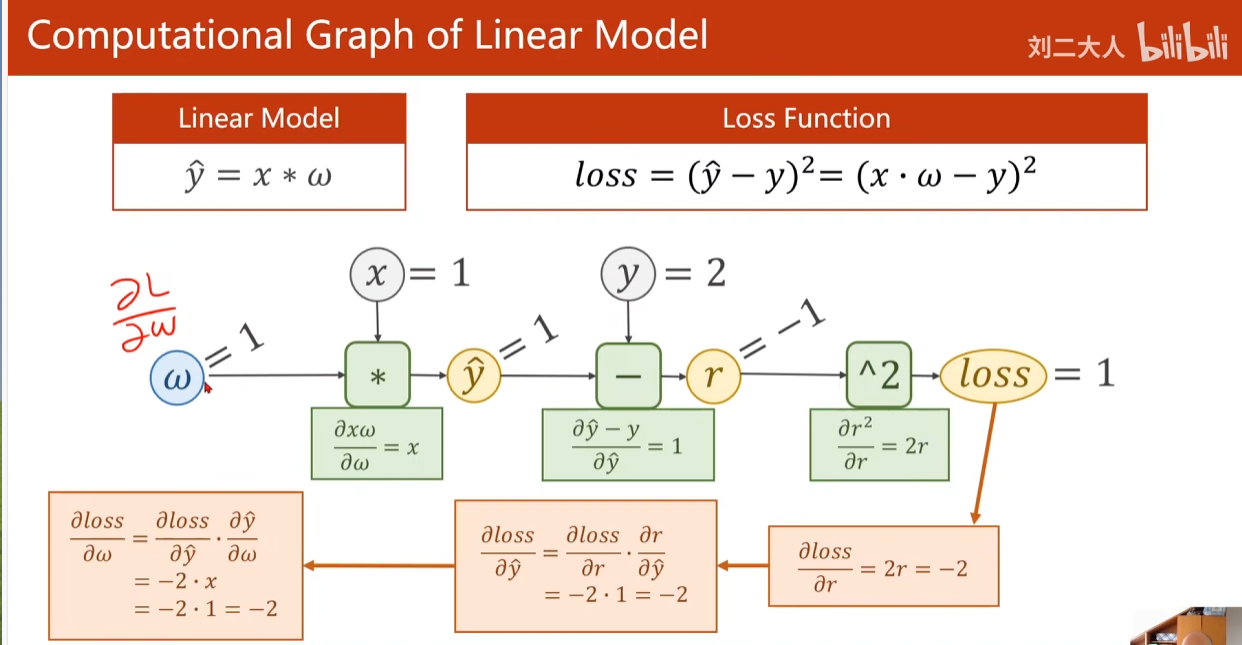

pytorch中最基本的数据类型叫tensor，用来存数据（标量，向量，矩阵）

包含：数据，梯度，计算图

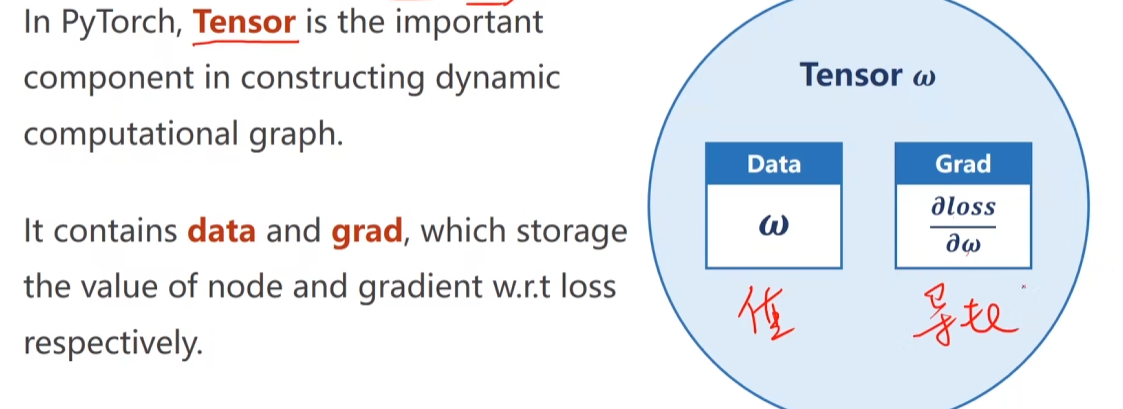


In [1]:
import torch

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]


w = torch.Tensor([1.0])#权重
w.requires_grad = True#需要计算梯度，默认是不计算


In [2]:
def forward(x):
    return x * w#前馈
    #运算符被重载了，默认是计算tensor,x类型自动转换了
    #返回的是tensor


def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2
#在pytorch中，所有的计算都要在计算图中，所以要在计算图中定义


损失累加错误：构建了计算图，造成内存爆炸，应该取item


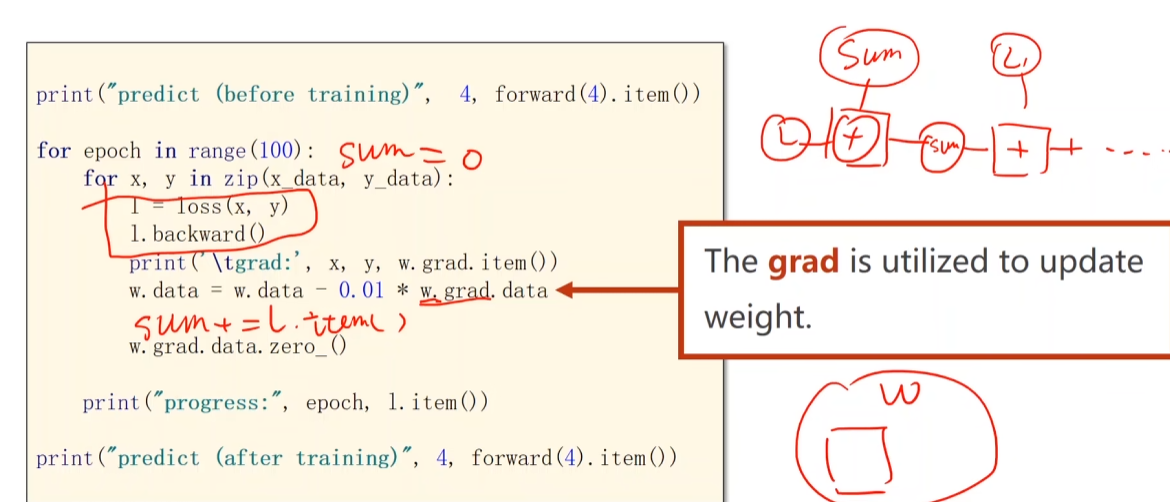

In [ ]:
# 训练前预测：输入 x=4，看模型（初始 w）的输出
print("predict (before training)", 4, forward(4).item())

# 训练循环：100 轮迭代
for epoch in range(100):
    # 遍历数据集（x_data, y_data 配对）
    for x, y in zip(x_data, y_data):
        # 1. 前向计算 loss
        l = loss(x, y)  
        # 2. 反向传播：计算 loss 对参数的梯度（如 w.grad）
        l.backward()  #只要计算反向传播，图就释放了


        # 打印梯度信息（调试用）
        print('\tgrad:', x, y, w.grad.item())
        w.data = w.data - 0.01 * w.grad.data #重点：取data，不会取grad产生计算图 # 学习率为0.01



        w.grad.data.zero_()  # 梯度清零,防止下一次计算梯度时累加


    print('progress:', epoch, l.item())  # 打印每轮训练的loss值

# 训练后预测：输入x=4，查看训练后的模型输出
print("predict (after training)", 4, forward(4).item())

predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.840000152587891
	grad: 3.0 6.0 -16.228801727294922
progress: 0 7.315943717956543
	grad: 1.0 2.0 -1.478623867034912
	grad: 2.0 4.0 -5.796205520629883
	grad: 3.0 6.0 -11.998146057128906
progress: 1 3.9987640380859375
	grad: 1.0 2.0 -1.0931644439697266
	grad: 2.0 4.0 -4.285204887390137
	grad: 3.0 6.0 -8.870372772216797
progress: 2 2.1856532096862793
	grad: 1.0 2.0 -0.8081896305084229
	grad: 2.0 4.0 -3.1681032180786133
	grad: 3.0 6.0 -6.557973861694336
progress: 3 1.1946394443511963
	grad: 1.0 2.0 -0.5975041389465332
	grad: 2.0 4.0 -2.3422164916992188
	grad: 3.0 6.0 -4.848389625549316
progress: 4 0.6529689431190491
	grad: 1.0 2.0 -0.4417421817779541
	grad: 2.0 4.0 -1.7316293716430664
	grad: 3.0 6.0 -3.58447265625
progress: 5 0.35690122842788696
	grad: 1.0 2.0 -0.3265852928161621
	grad: 2.0 4.0 -1.2802143096923828
	grad: 3.0 6.0 -2.650045394897461
progress: 6 0.195076122879982
	grad: 1.0 2.0 -0.24144840240478516
	grad: 2.

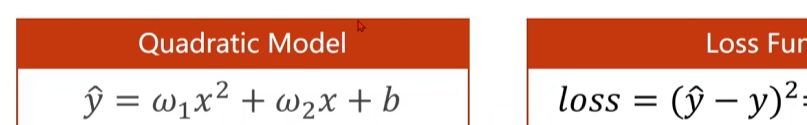

In [7]:
import torch
#x**2+2x+1
x_data = [1.0, 2.0, 3.0]
y_data = [4.0, 9.0, 16.0]

# 二次模型需要三个参数：w1(x²的系数), w2(x的系数), b(偏置)
w1 = torch.Tensor([1.0])  # 权重
w1.requires_grad = True   # 需要计算梯度，默认是不计算

w2 = torch.Tensor([1.0])  # 权重
w2.requires_grad = True

b = torch.Tensor([0.0])   # 偏置
b.requires_grad = True


def forward(x):  # Ctrl+U 添加上下文到对话
    """前向传播：实现二次模型 y = w1*x² + w2*x + b"""
    return w1 * x * x + w2 * x + b
    # 运算符被重载了，默认是计算tensor，x类型自动转换了
    # 返回的是tensor


def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2
    # 在pytorch中，所有的计算都要在计算图中，所以要在计算图中定义


# 训练前预测：输入 x=4，看模型（初始 w1,w2,b）的输出
print('predict (before training)', 4, forward(4).item())

# 训练循环：100 轮迭代
for epoch in range(600):
    # 遍历数据集（x_data, y_data 配对）
    for x, y in zip(x_data, y_data):
        # 1. 前向计算 loss
        l = loss(x, y)
        # 2. 反向传播：计算 loss 对参数的梯度（加 w1.grad, w2.grad, b.grad）
        l.backward()  # 只要计算反向传播，图就释放了
        
        # 打印梯度信息（调试用）
        print('\tgrad:', x, y, w1.grad.item(), w2.grad.item(), b.grad.item())
        
        # 3. 更新参数（梯度下降）
        w1.data = w1.data - 0.01 * w1.grad.data  # 重点：取data，不会取grad产生计算图 # 学习率为0.01
        w2.data = w2.data - 0.01 * w2.grad.data
        b.data = b.data - 0.01 * b.grad.data
        
        # 梯度清零，防止下一次计算梯度时累加
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        b.grad.data.zero_()
    
    print('progress:', epoch, l.item())  # 打印每轮训练的loss值

# 训练后预测：输入x=4，查看训练后的模型输出
print("predict (after training)", 4, forward(4).item())
print(f"最终参数: w1={w1.item():.4f}, w2={w2.item():.4f}, b={b.item():.4f}")

predict (before training) 4 20.0
	grad: 1.0 4.0 -4.0 -4.0 -4.0
	grad: 2.0 9.0 -21.76000213623047 -10.880001068115234 -5.440000534057617
	grad: 3.0 16.0 -20.534408569335938 -6.8448028564453125 -2.2816009521484375
progress: 0 1.3014256954193115
	grad: 1.0 4.0 -2.405183792114258 -2.405183792114258 -2.405183792114258
	grad: 2.0 9.0 -3.4251937866210938 -1.7125968933105469 -0.8562984466552734
	grad: 3.0 16.0 29.094097137451172 9.69803237915039 3.232677459716797
progress: 1 2.612550973892212
	grad: 1.0 4.0 -2.981487274169922 -2.981487274169922 -2.981487274169922
	grad: 2.0 9.0 -11.437393188476562 -5.718696594238281 -2.8593482971191406
	grad: 3.0 16.0 5.250846862792969 1.7502822875976562 0.5834274291992188
progress: 2 0.08509688824415207
	grad: 1.0 4.0 -2.553980827331543 -2.553980827331543 -2.553980827331543
	grad: 2.0 9.0 -7.21044921875 -3.605224609375 -1.8026123046875
	grad: 3.0 16.0 15.622833251953125 5.207611083984375 1.735870361328125
progress: 3 0.7533114552497864
	grad: 1.0 4.0 -2.59970